In [ ]:
# import the required libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df=pd.read_excel("/content/labeled_comments (1).xlsx")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21424 entries, 0 to 21423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    21417 non-null  object
 1   label   21424 non-null  object
dtypes: object(2)
memory usage: 334.9+ KB


In [ ]:
df.head(10)

,text,label
0,it is necessary to read it one more time try t...,not hate
1,shame on communal minded,not hate
2,politics is worsening day by day,not hate
3,the butcher of gujratmodi,not hate
4,dont worry modi again will come in power look ...,not hate
5,modi in fire power :fire::flexedbiceps:,not hate
6,he is worst person in the worldeven though he ...,hate
7,modi is the ambassador of islamophobia,not hate
8,propaganda of a pro muslim new house,not hate
9,he knows he is loosing election and using his ...,hate


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21424 entries, 0 to 21423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    21417 non-null  object
 1   label   21424 non-null  object
dtypes: object(2)
memory usage: 334.9+ KB


In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Initialize stop words
stop_words = set(stopwords.words('english'))

# Function to remove stop words
def remove_stopwords(text):
    if not isinstance(text, str):
        text = ""  # Convert non-string values to empty strings
    return ' '.join(word for word in text.split() if word.lower() not in stop_words)

# Apply the function to the 'text' column
df['text'] = df['text'].apply(remove_stopwords)

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatizing(data):
    # Ensure data is a string to avoid TypeError
    if isinstance(data, str):
        return " ".join([lemmatizer.lemmatize(word) for word in data.split()])
    return data  # Return the original data if it's not a string

df['text'] = df['text'].apply(lemmatizing)


In [ ]:
df.head()

,text,label
0,necessary read one time try make people crazy ...,not hate
1,shame communal minded,not hate
2,politics worsening day day,not hate
3,butcher gujratmodi,not hate
4,dont worry modi come power look ur backyard u ...,not hate


<Axes: xlabel='label', ylabel='count'>

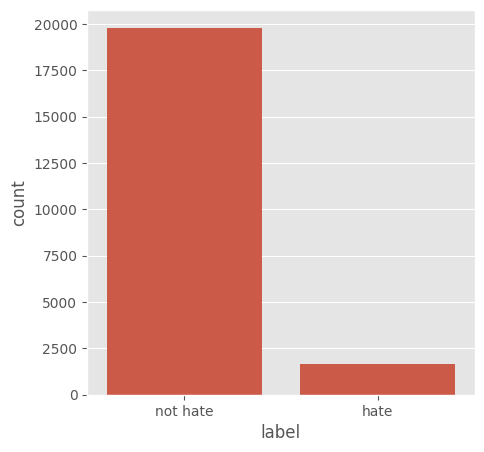

In [ ]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='label', data = df)

Text(0.5, 1.0, 'Distribution of sentiments')

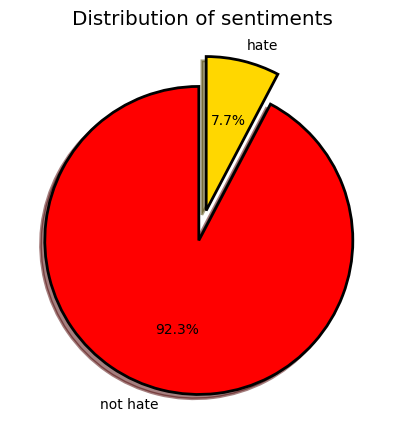

In [ ]:
fig = plt.figure(figsize=(5,5))
colors = ("red", "gold")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = df['label'].value_counts()
explode = (0.1, 0.1)
tags.plot(kind='pie',autopct = '%1.1f%%', shadow=True, colors = colors, startangle =90,
         wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [ ]:
non_hate = df[df.label == 'not hate']
non_hate.head()

,text,label
0,necessary read one time try make people crazy ...,not hate
1,shame communal minded,not hate
2,politics worsening day day,not hate
3,butcher gujratmodi,not hate
4,dont worry modi come power look ur backyard u ...,not hate


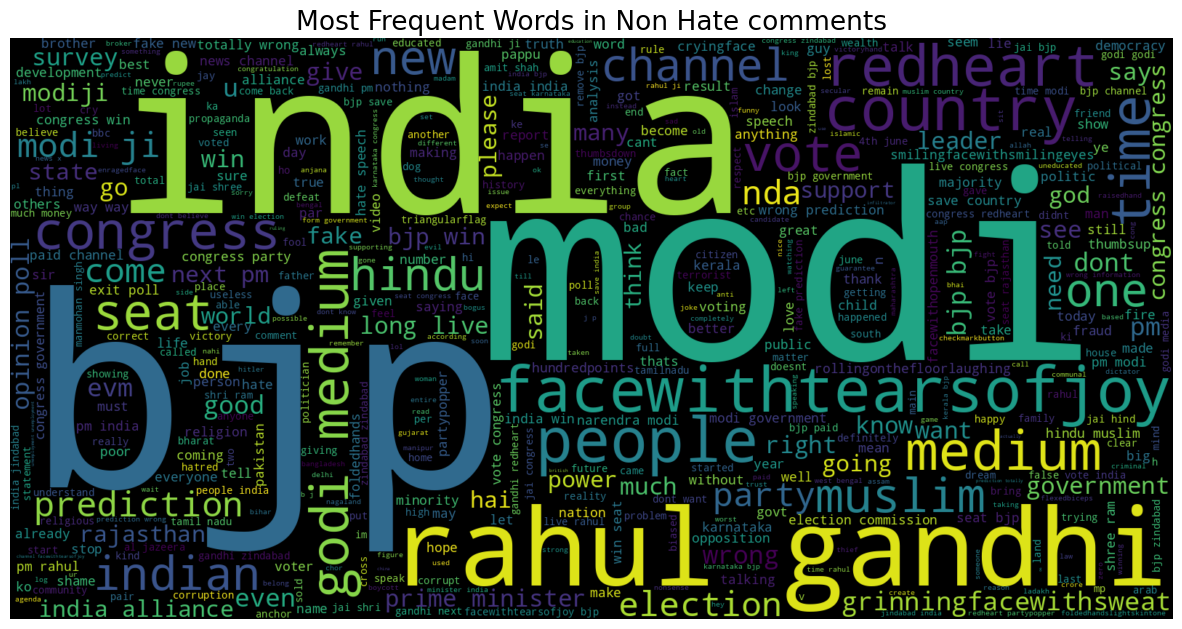

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Filter non-hate tweets
non_hate = df[df.label == 'not hate']

# Join all non-hate tweet texts into a single string, ensuring only strings are included
text = ' '.join([str(word) for word in non_hate['text'] if isinstance(word, str)])

# Generate the word cloud
plt.figure(figsize=(15, 15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Non Hate comments', fontsize=19)
plt.show()


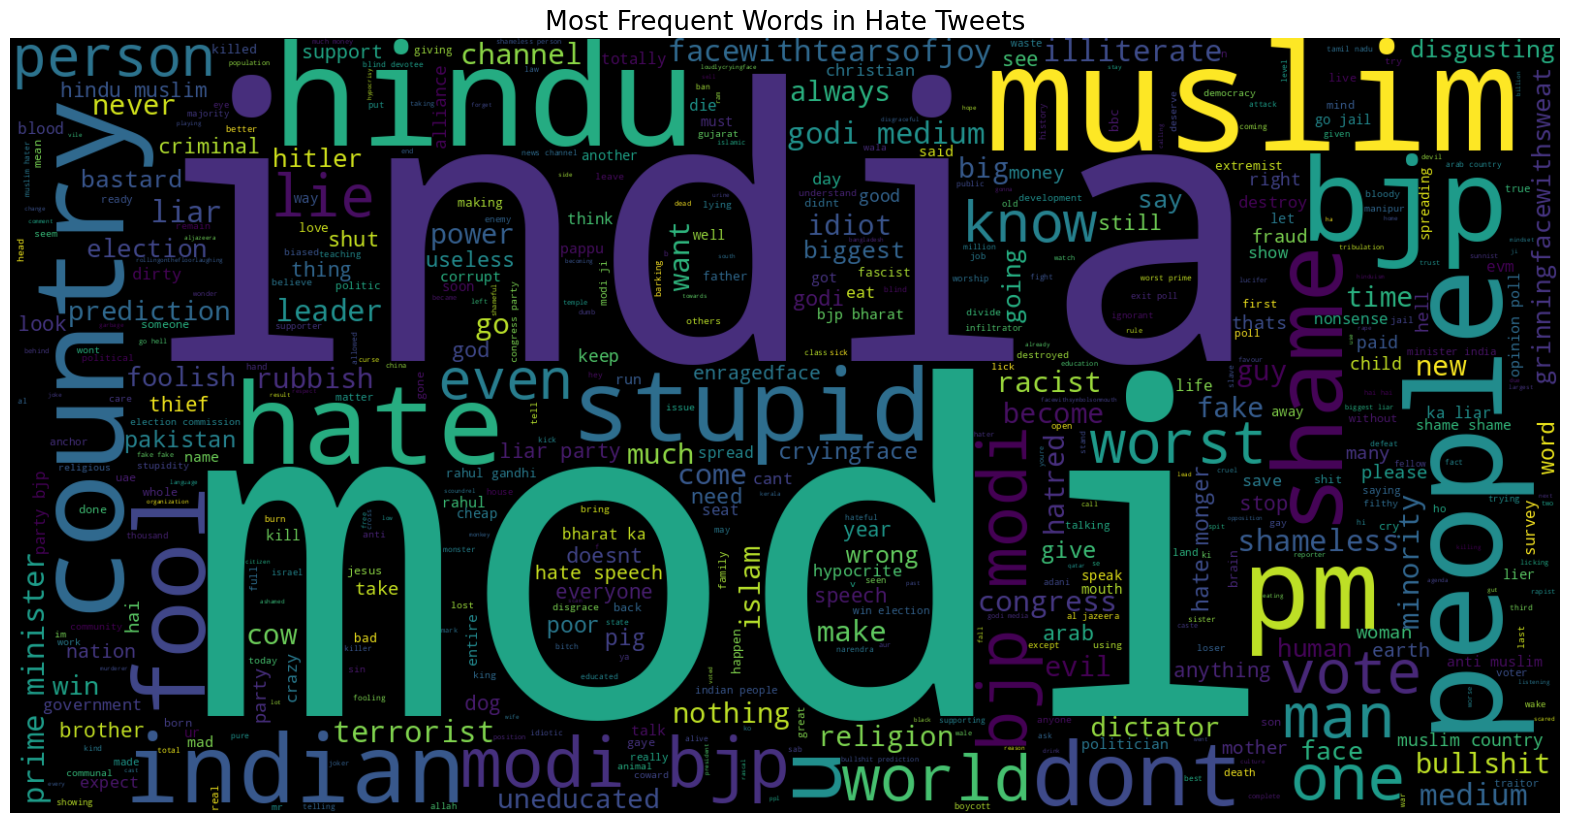

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Filter non-hate tweets
hate = df[df.label == 'hate']

# Join all non-hate tweet texts into a single string, ensuring only strings are included
text = ' '.join([str(word) for word in hate['text'] if isinstance(word, str)])

# Generate the word cloud
plt.figure(figsize=(20, 15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Hate Tweets', fontsize=19)
plt.show()


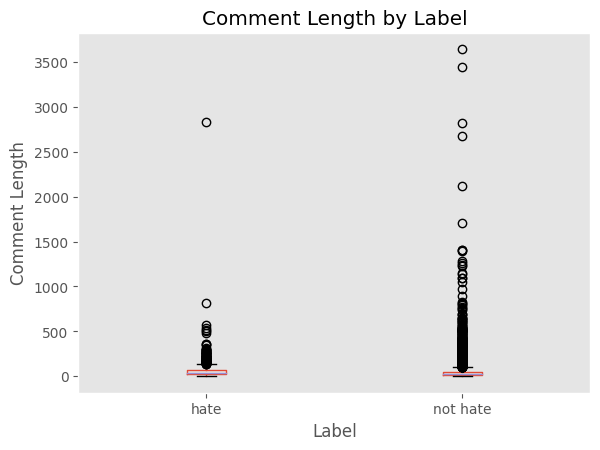

In [ ]:
# Create a new column for comment length, handling non-string values
df['comment_length'] = df['text'].apply(lambda x: len(x) if isinstance(x, str) else 0)

# Create the boxplot
df.boxplot(column='comment_length', by='label', grid=False)
plt.title("Comment Length by Label")
plt.suptitle("")  # Suppress the default title
plt.xlabel("Label")
plt.ylabel("Comment Length")
plt.show()


In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer

# def get_top_ngrams(corpus, n=None, ngram_range=(2, 2)):
#     # Initialize CountVectorizer with specified ngram_range and parameters
#     vec = CountVectorizer(ngram_range=ngram_range, max_features=50, stop_words='english').fit(corpus)
#     bag_of_words = vec.transform(corpus)
#     sum_words = bag_of_words.sum(axis=0)
#     words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
#     words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
#     return words_freq[:n]

# for label in ['hate', 'not hate']:
#     # Filter out NaN values and extract text for the current label
#     filtered_text = df[df['label'] == label]['text'].dropna()
#     ngrams = get_top_ngrams(filtered_text, n=10, ngram_range=(2, 2))
#     print(f"Top bigrams in {label} comments: {ngrams}")





In [ ]:
df.isna().sum()

,0
text,0
label,0
comment_length,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21424 entries, 0 to 21423
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            21424 non-null  object
 1   label           21424 non-null  object
 2   comment_length  21424 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 502.2+ KB


In [ ]:
missing_values = df[df.isnull().any(axis=1)]
print("Rows with missing values:")
print(missing_values)

Rows with missing values:
Empty DataFrame
Columns: [text, label, comment_length]
Index: []


In [ ]:
df = df.dropna(subset=['text'])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Filter hate comments
hate_comments = df[df['label'] == 'hate']['text']
# Filter non-hate comments
non_hate_comments = df[df['label'] == 'not hate']['text']

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(2, 2), max_features=50, stop_words='english')

# Fit and transform the hate comments
tfidf_hate = tfidf_vectorizer.fit_transform(hate_comments)
ngram_features_hate = tfidf_vectorizer.get_feature_names_out()
tfidf_hate_array = tfidf_hate.toarray()

# Fit and transform the non-hate comments
tfidf_vectorizer_non_hate = TfidfVectorizer(ngram_range=(2, 2), max_features=50, stop_words='english')
tfidf_non_hate = tfidf_vectorizer_non_hate.fit_transform(non_hate_comments)
ngram_features_non_hate = tfidf_vectorizer_non_hate.get_feature_names_out()
tfidf_non_hate_array = tfidf_non_hate.toarray()

# Display the results
print("Top bigram features in hate comments:")
print(ngram_features_hate)

print("\nTop bigram features in non-hate comments:")
print(ngram_features_non_hate)




Top bigram features in hate comments:
['al jazeera' 'anti muslim' 'arab country' 'bharat ka' 'bjp bharat'
 'bjp modi' 'blind devotee' 'congress party' 'dont vote'
 'election commission' 'exit poll' 'godi medium' 'hate modi' 'hate monger'
 'hate muslim' 'hate speech' 'hindu muslim' 'indian hindu' 'indian muslim'
 'indian people' 'ka liar' 'liar party' 'like modi' 'look like'
 'minister india' 'modi anti' 'modi big' 'modi biggest' 'modi bjp'
 'modi hate' 'modi ji' 'modi terrorist' 'muslim country' 'muslim vote'
 'news channel' 'opinion poll' 'party bjp' 'people india' 'pm india'
 'pm modi' 'prime minister' 'rahul gandhi' 'shame modi' 'shame shame'
 'shameless pm' 'tamil nadu' 'vote bjp' 'win election' 'worst pm'
 'worst prime']

Top bigram features in non-hate comments:
['10 year' '4th june' 'al jazeera' 'bjp bjp' 'bjp government' 'bjp paid'
 'bjp win' 'bjp zindabad' 'congress congress' 'congress government'
 'congress party' 'congress redheart' 'congress win' 'election commission'
 'exi

In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296185 sha256=0a1385bf3f4d3e7e5676ea7e7f32e212bcf488d2fe743b9dacb4b8cd81ec6ceb
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [ ]:
# import fasttext
# import fasttext.util

# # Load FastText model (you can adjust language as needed)
# fasttext.util.download_model('en', if_exists='ignore')  # English model
# ft = fasttext.load_model('cc.en.300.bin')  # 300-dimensional FastText embeddings

# # Function to get the average FastText embedding for each comment
# def get_fasttext_embedding(text):
#     words = text.split()
#     word_embeddings = [ft.get_word_vector(word) for word in words]
#     if word_embeddings:
#         return np.mean(word_embeddings, axis=0)
#     else:
#         return np.zeros(300)  # returns a zero vector if no words in text

# # Apply to your DataFrame to create embedding vectors
# df['embedding'] = df['text'].apply(get_fasttext_embedding)
# X = np.array(df['embedding'].tolist())  # Features
# y = df['label']  # Target labels


In [ ]:
!pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 kB 4.5 MB/s eta 0:00:00


In [ ]:
from sentence_transformers import SentenceTransformer
# Load pre-trained SBERT model (you can choose a lightweight version for faster processing)
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Generate embeddings for the 'text' column in your dataset
embeddings = model.encode(df['text'].tolist())
X = np.array(embeddings)
y = df['label']

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
X

array([[-0.09705593, -0.18709214, -0.25649077, ...,  0.30440053,
        -0.18622755,  0.39188948],
       [ 0.2307971 ,  0.41966763,  0.04484674, ...,  0.44137186,
        -0.7191559 , -0.39041054],
       [ 0.01996813,  0.47636753,  0.4466539 , ..., -0.14463548,
        -0.26252243,  0.39348552],
       ...,
       [ 0.06015999, -0.3482994 , -0.15273598, ..., -0.37178436,
         0.09280353,  0.55549794],
       [-0.05507519,  0.14940108, -0.20739608, ...,  0.46620086,
        -0.4897367 ,  0.25026193],
       [-0.05763904, -0.16428858, -0.02765275, ..., -0.10687312,
        -0.3246788 , -0.00142479]], dtype=float32)

In [ ]:
# Map 'not hate' to 0 and 'hate' to 1
df['label'] = df['label'].map({'not hate': 0, 'hate': 1})

In [ ]:
y=df['label']

In [ ]:
y.head()

,label
0,0
1,0
2,0
3,0
4,0


In [ ]:

from imblearn.over_sampling import SMOTE

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Fit and resample
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print(pd.Series(y_resampled).value_counts())

label
0    15822
1    15822
Name: count, dtype: int64


In [ ]:
# Initialize and train a classifier (Random Forest in this case)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [ ]:
# Step 4: Evaluate the model
y_pred_1 = model.predict(X_test)
print(confusion_matrix(y_test, y_pred_1))
print(classification_report(y_test, y_pred_1))

[[3854   98]
 [ 211  122]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      3952
           1       0.55      0.37      0.44       333

    accuracy                           0.93      4285
   macro avg       0.75      0.67      0.70      4285
weighted avg       0.92      0.93      0.92      4285



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [ ]:
gbc.fit(X_resampled, y_resampled)

GradientBoostingClassifier()

In [ ]:
y_pred = gbc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3563  389]
 [ 109  224]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      3952
           1       0.37      0.67      0.47       333

    accuracy                           0.88      4285
   macro avg       0.67      0.79      0.70      4285
weighted avg       0.92      0.88      0.90      4285



In [ ]:
lg = LogisticRegression()
lg.fit(X_resampled, y_resampled)

LogisticRegression()

In [ ]:
# Evaluate the model
y_pred = lg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3546  406]
 [  72  261]]
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      3952
           1       0.39      0.78      0.52       333

    accuracy                           0.89      4285
   macro avg       0.69      0.84      0.73      4285
weighted avg       0.93      0.89      0.90      4285



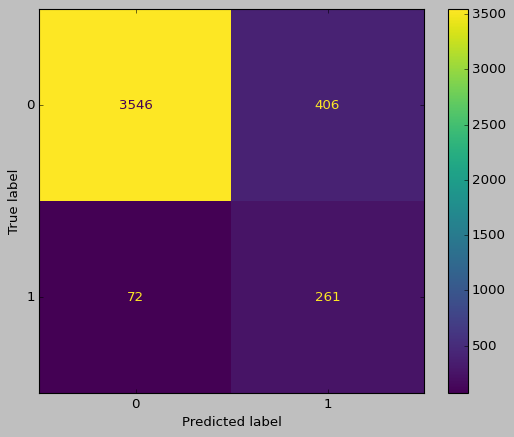

In [ ]:
style.use('classic')
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization type
    'C': [0.01, 0.1, 1, 10, 100],                   # Inverse of regularization strength
    'solver': ['saga', 'liblinear'],                # Solvers supporting 'l1', 'l2', and 'elasticnet'
    'class_weight': ['balanced', None]              # Adjusting for class imbalance
}


In [ ]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_resampled, y_resampled)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Parameters: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'saga'}


In [ ]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[3556  396]
 [  71  262]]


              precision    recall  f1-score   support

           0       0.98      0.90      0.94      3952
           1       0.40      0.79      0.53       333

    accuracy                           0.89      4285
   macro avg       0.69      0.84      0.73      4285
weighted avg       0.94      0.89      0.91      4285



In [ ]:
len(y_test)

4285